In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn
import time

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

In [2]:
## Read Data
df_cluster = pd.read_csv('cluster_Aud.csv')

## Standalization & Remove Outlier

In [3]:
## with Standalization + with outlier 
#Standalization 
df_cluster_with_outlier = pd.DataFrame(StandardScaler().fit_transform(df_cluster))
# Rename Attribute 
nameList = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]
df_cluster_with_outlier.set_axis(nameList, axis=1,inplace=True)

In [4]:
## with Standarlization + without outlier
# Remove Outlier 
Q1 = df_cluster.quantile(0.25)
Q3 = df_cluster.quantile(0.75)
IQR = Q3 - Q1
df_cluster_without_outlier = df_cluster[~((df_cluster < (Q1 - 1.5 * IQR)) |(df_cluster > (Q3 + 1.5 * IQR))).any(axis=1)]
#Standalization 
df_cluster_without_outlier = pd.DataFrame(StandardScaler().fit_transform(df_cluster_without_outlier))
# Rename Attribute 
nameList = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]
df_cluster_without_outlier.set_axis(nameList, axis=1,inplace=True)

In [5]:
## without Standalization + with outlier 
# df_cluster

In [6]:
## without Standarlization + without outlier 
# Remove Outlier
df_without_outlier = df_cluster[~((df_cluster < (Q1 - 1.5 * IQR)) |(df_cluster > (Q3 + 1.5 * IQR))).any(axis=1)]

## Find Best K-Means Model 

In [7]:
sse_1,sse_2,sse_3,sse_4 = [], [], [], []
# without Standalization + with outlier
X_1 = df_cluster.to_numpy()
# without Standarlization + without outlier 
X_2 = df_without_outlier.to_numpy()
# with Standalization + with outlier
X_3 = df_cluster_with_outlier.to_numpy()
# with Standarlization + without outlier
X_4 = df_cluster_without_outlier.to_numpy()
for k in range(2, 50):

    # Run K-Means for the current number of clusters k
    kmeans_1 = KMeans(n_clusters=k).fit(X_1)
    kmeans_2 = KMeans(n_clusters=k).fit(X_2)
    kmeans_3 = KMeans(n_clusters=k).fit(X_3)
    kmeans_4 = KMeans(n_clusters=k).fit(X_4)
    # "inertia_" holds the sum of squared distances of samples to their closest cluster center
    # Record the current (k, sse) pair
    sse_1.append((k, kmeans_1.inertia_))  
    sse_2.append((k, kmeans_2.inertia_))
    sse_3.append((k, kmeans_3.inertia_))
    sse_4.append((k, kmeans_4.inertia_))
    
# Convert to numpy array for convenience
sse_1 = np.array(sse_1)
sse_2 = np.array(sse_2)
sse_3 = np.array(sse_3)
sse_4 = np.array(sse_4)
#print(sse_1[6],sse_2,sse_3,sse_4)

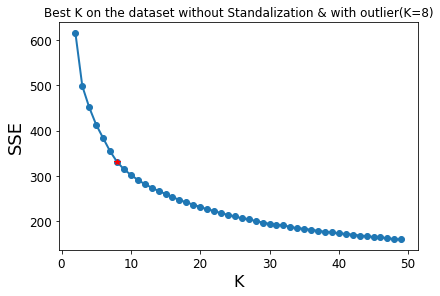

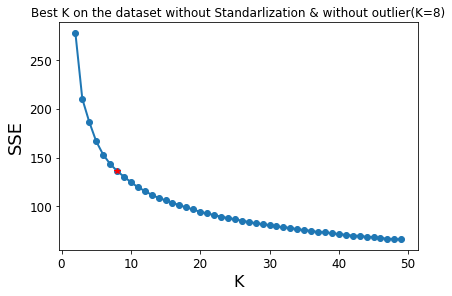

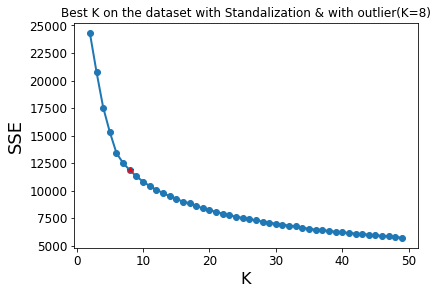

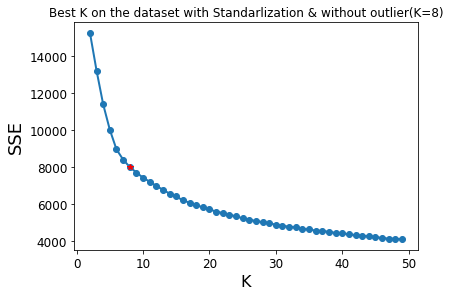

In [8]:
plt.figure()
plt.xlabel('K', fontsize=16)
plt.ylabel('SSE', fontsize=18)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.plot([s[0] for s in sse_1], [s[1] for s in sse_1], marker='o', lw=2)
plt.tight_layout()
plt.plot(sse_1[6][0],sse_1[6][1], 'r*')
plt.title("Best K on the dataset without Standalization & with outlier(K=8)")
plt.show()

plt.figure()
plt.xlabel('K', fontsize=16)
plt.ylabel('SSE', fontsize=18)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.plot([s[0] for s in sse_2], [s[1] for s in sse_2], marker='o', lw=2)
plt.tight_layout()
plt.plot(sse_2[6][0],sse_2[6][1], 'r*')
plt.title("Best K on the dataset without Standarlization & without outlier(K=8)")
plt.show()

plt.figure()
plt.xlabel('K', fontsize=16)
plt.ylabel('SSE', fontsize=18)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.plot([s[0] for s in sse_3], [s[1] for s in sse_3], marker='o', lw=2)
plt.tight_layout()
plt.plot(sse_3[6][0],sse_3[6][1], 'r*')
plt.title("Best K on the dataset with Standalization & with outlier(K=8)")
plt.show()

plt.figure()
plt.xlabel('K', fontsize=16)
plt.ylabel('SSE', fontsize=18)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.plot([s[0] for s in sse_4], [s[1] for s in sse_4], marker='o', lw=2)
plt.tight_layout()
plt.plot(sse_4[6][0],sse_4[6][1], 'r*')
plt.title("Best K on the dataset with Standarlization & without outlier(K=8)")
plt.show()

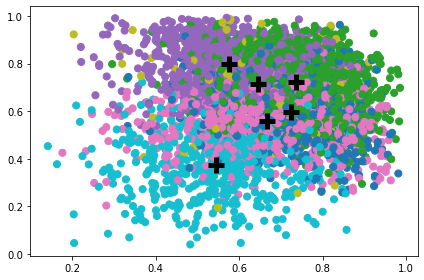

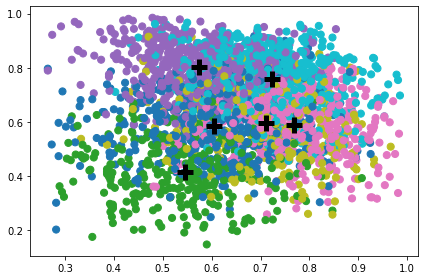

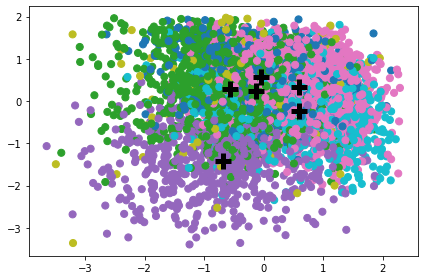

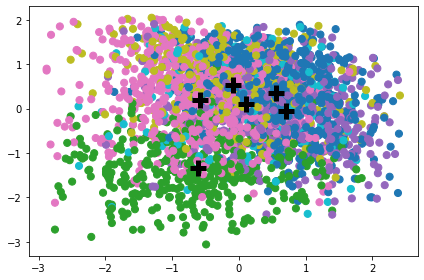

In [21]:
def plot_clusters(kmeans, data):
    plt.figure()
    
    # Plot all the data points a color-code them w.r.t. to their cluster label/id
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, s=50, cmap=plt.cm.tab10)
    
    # Plot the cluster centroids as fat plus signs
    for cluster_id, centroid in enumerate(kmeans.cluster_centers_):
        plt.scatter(centroid[0], centroid[1], marker='+', color='k', s=250, lw=5)

    plt.tight_layout()
    plt.show()
    
kmeans_1 = KMeans(n_clusters=6).fit(X_1)
kmeans_2 = KMeans(n_clusters=6).fit(X_2)
kmeans_3 = KMeans(n_clusters=6).fit(X_3)
kmeans_4 = KMeans(n_clusters=6).fit(X_4)

plot_clusters(kmeans_1, X_1)
plot_clusters(kmeans_2, X_2)
plot_clusters(kmeans_3, X_3)
plot_clusters(kmeans_4, X_4)

## Upon the best K-means model, looking into each cluster under each feature with Histogram 

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 88em; }</style>"))

# histegram 
df_cluster_Aud = df_without_outlier
X = df_cluster_Aud.to_numpy()
kmeans = KMeans(n_clusters=8).fit(X)
# creating a list for new column
Cluster_label = kmeans.labels_


/var/folders/bk/kj0nx4px3bq_q295vnctbb5c0000gn/T/ipykernel_278/1188100594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_1[col] = pd.to_numeric(df_cluster_1[col])


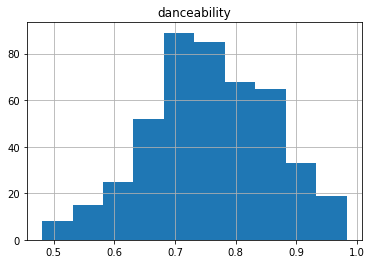

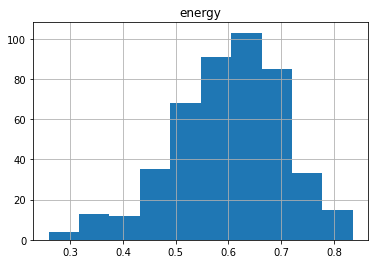

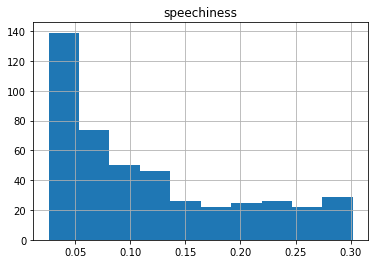

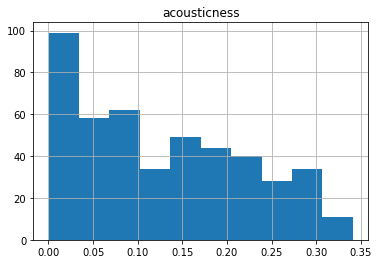

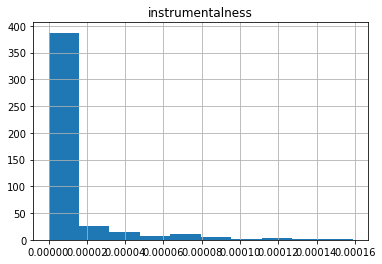

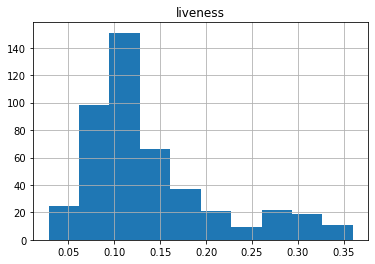

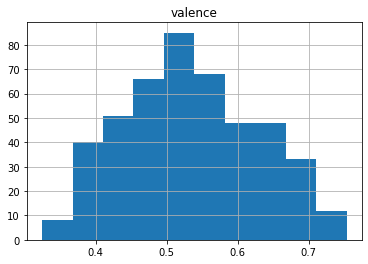

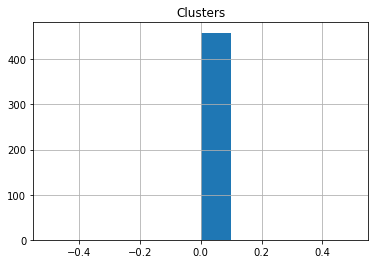

In [11]:
# Plot the histograms 1st cluster 
df_cluster_Aud = df_cluster_Aud.assign(Clusters = Cluster_label)
df_cluster_1 = df_cluster_Aud[df_cluster_Aud['Clusters'] == 0]

for col in df_cluster_1.columns: 
    try:      
        df_cluster_1[col] = pd.to_numeric(df_cluster_1[col]) 
        df_cluster_1.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

/var/folders/bk/kj0nx4px3bq_q295vnctbb5c0000gn/T/ipykernel_278/2910721916.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_2[col] = pd.to_numeric(df_cluster_2[col])


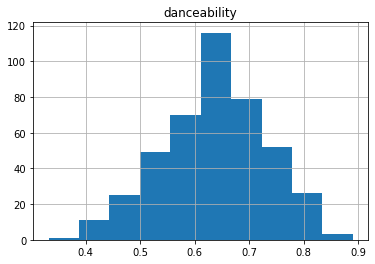

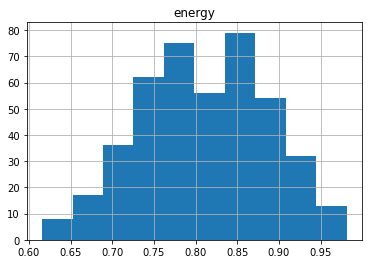

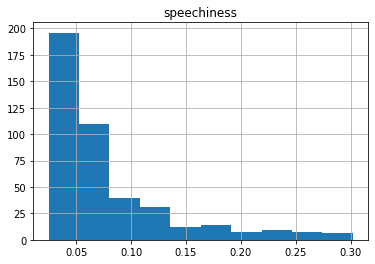

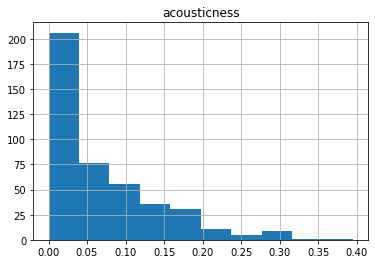

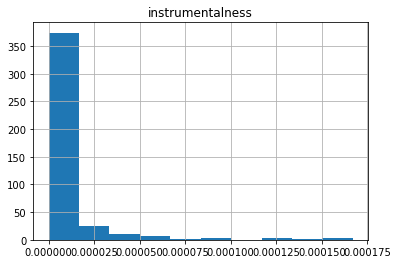

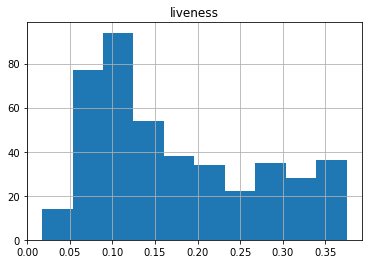

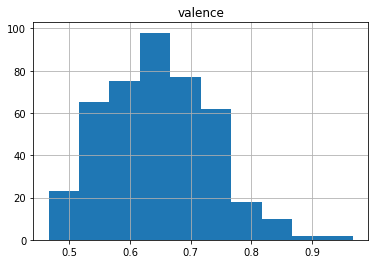

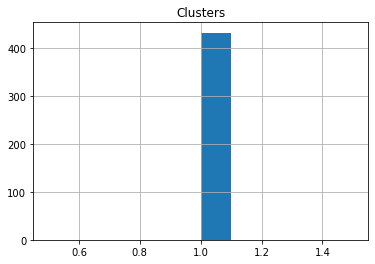

In [12]:
# Plot the histograms 2st cluster 
df_cluster_Aud = df_cluster_Aud.assign(Clusters = Cluster_label)
df_cluster_2 = df_cluster_Aud[df_cluster_Aud['Clusters'] == 1]

for col in df_cluster_2.columns: 
    try:      
        df_cluster_2[col] = pd.to_numeric(df_cluster_2[col]) 
        df_cluster_2.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

/var/folders/bk/kj0nx4px3bq_q295vnctbb5c0000gn/T/ipykernel_278/4062998786.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3[col] = pd.to_numeric(df_cluster_3[col])


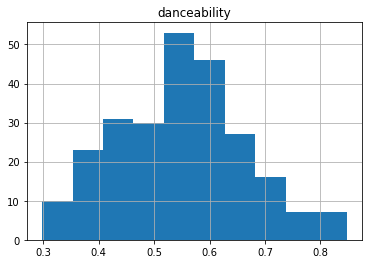

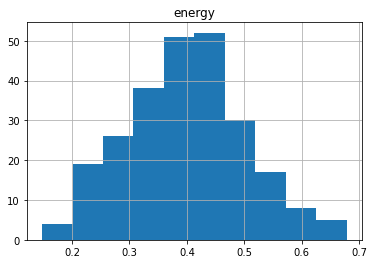

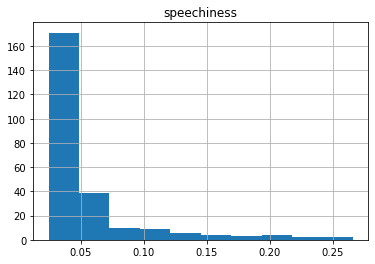

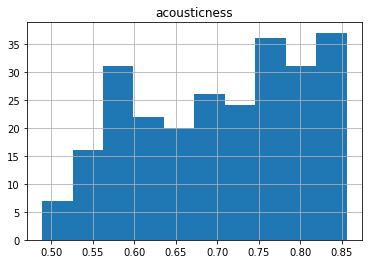

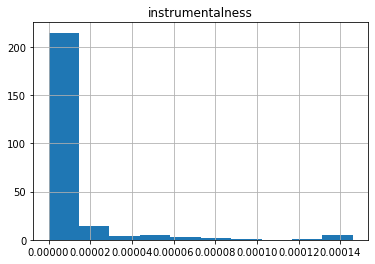

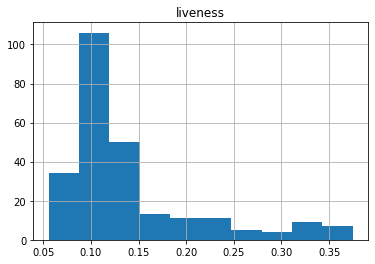

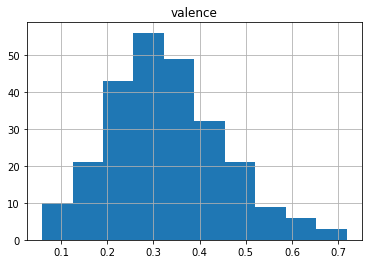

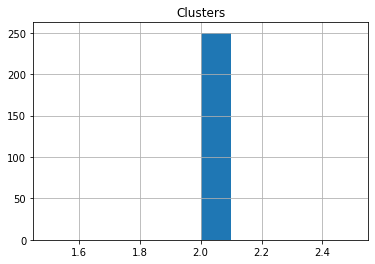

In [13]:
# Plot the histograms 3rd cluster 
df_cluster_Aud = df_cluster_Aud.assign(Clusters = Cluster_label)
df_cluster_3 = df_cluster_Aud[df_cluster_Aud['Clusters'] == 2]

for col in df_cluster_3.columns: 
    try:      
        df_cluster_3[col] = pd.to_numeric(df_cluster_3[col]) 
        df_cluster_3.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

/var/folders/bk/kj0nx4px3bq_q295vnctbb5c0000gn/T/ipykernel_278/3920236068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_4[col] = pd.to_numeric(df_cluster_4[col])


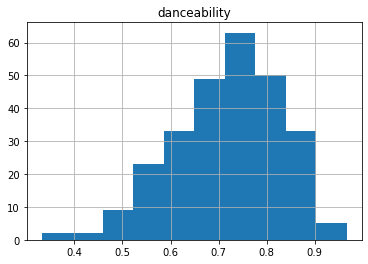

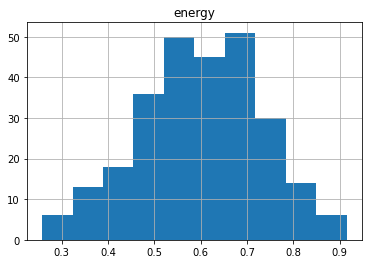

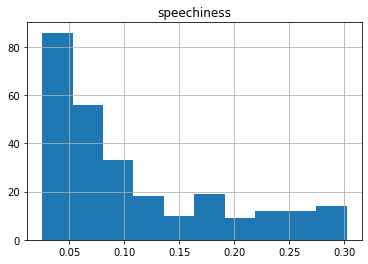

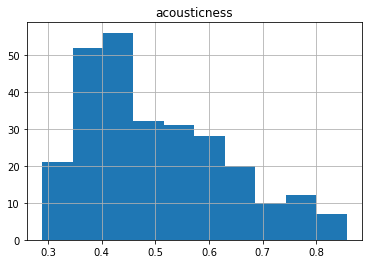

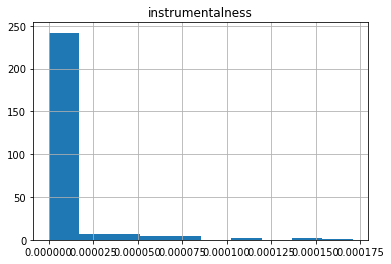

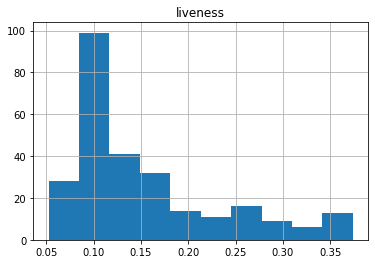

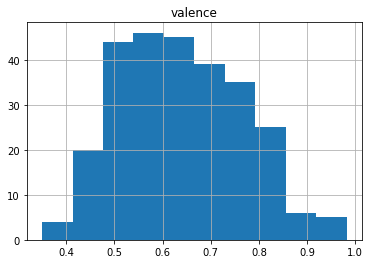

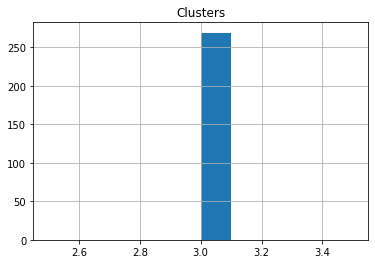

In [14]:
# Plot the histograms 4th cluster 
df_cluster_Aud = df_cluster_Aud.assign(Clusters = Cluster_label)
df_cluster_4 = df_cluster_Aud[df_cluster_Aud['Clusters'] == 3]

for col in df_cluster_4.columns: 
    try:      
        df_cluster_4[col] = pd.to_numeric(df_cluster_4[col]) 
        df_cluster_4.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

/var/folders/bk/kj0nx4px3bq_q295vnctbb5c0000gn/T/ipykernel_278/4041905696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_5[col] = pd.to_numeric(df_cluster_5[col])


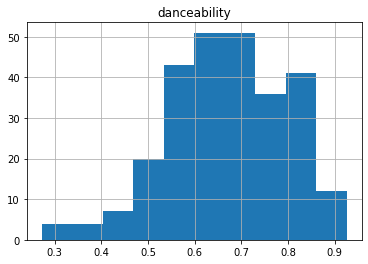

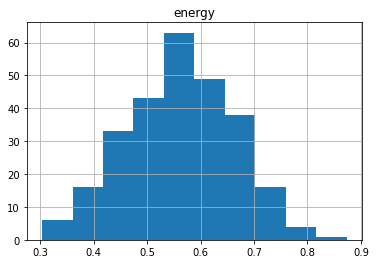

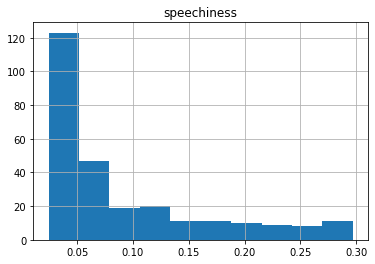

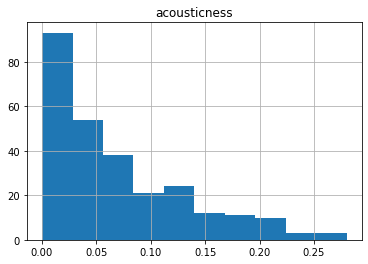

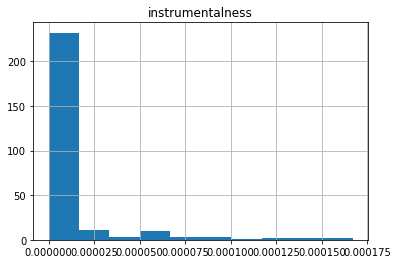

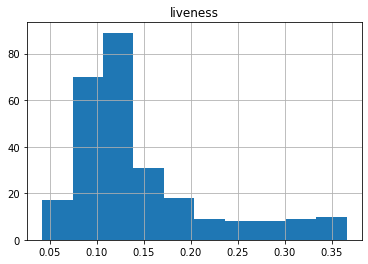

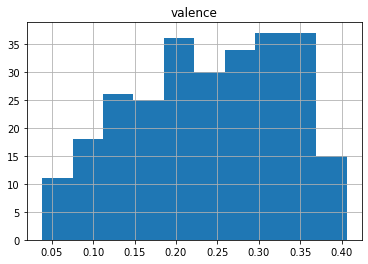

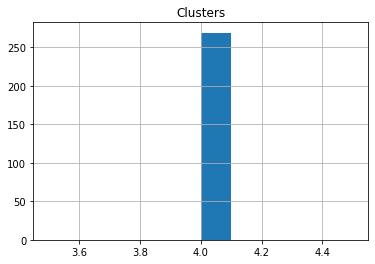

In [15]:
# Plot the histograms 5th cluster 
df_cluster_Aud = df_cluster_Aud.assign(Clusters = Cluster_label)
df_cluster_5 = df_cluster_Aud[df_cluster_Aud['Clusters'] == 4]

for col in df_cluster_5.columns: 
    try:      
        df_cluster_5[col] = pd.to_numeric(df_cluster_5[col]) 
        df_cluster_5.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

/var/folders/bk/kj0nx4px3bq_q295vnctbb5c0000gn/T/ipykernel_278/128670872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_6[col] = pd.to_numeric(df_cluster_6[col])


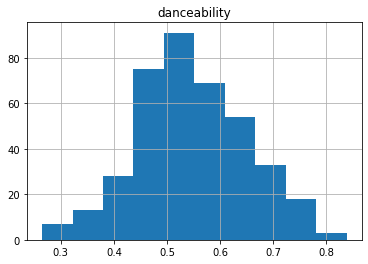

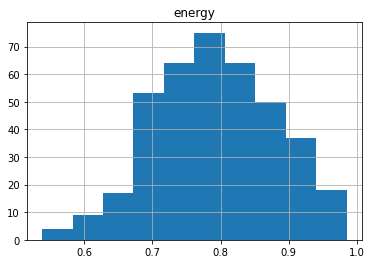

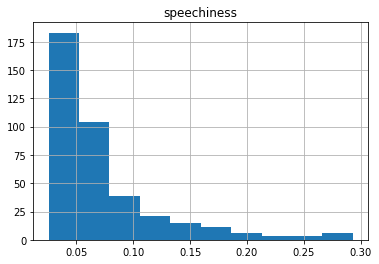

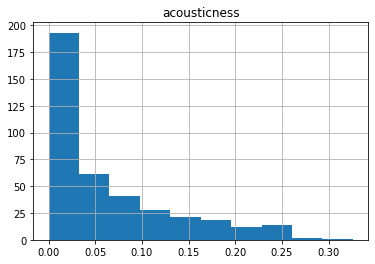

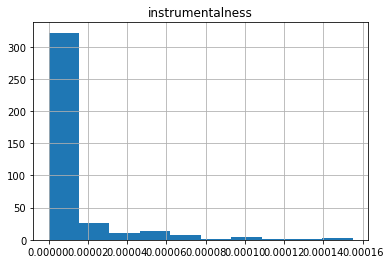

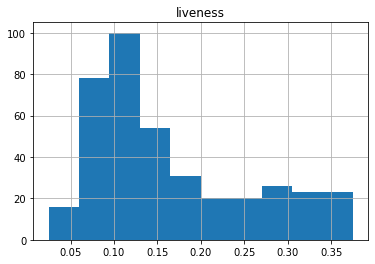

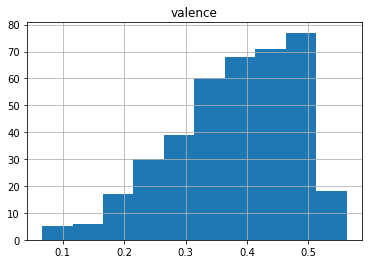

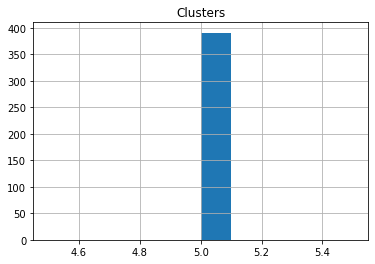

In [16]:
# Plot the histograms 6th cluster 
df_cluster_Aud = df_cluster_Aud.assign(Clusters = Cluster_label)
df_cluster_6 = df_cluster_Aud[df_cluster_Aud['Clusters'] == 5]

for col in df_cluster_6.columns: 
    try:      
        df_cluster_6[col] = pd.to_numeric(df_cluster_6[col]) 
        df_cluster_6.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

/var/folders/bk/kj0nx4px3bq_q295vnctbb5c0000gn/T/ipykernel_278/3649917946.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_7[col] = pd.to_numeric(df_cluster_7[col])


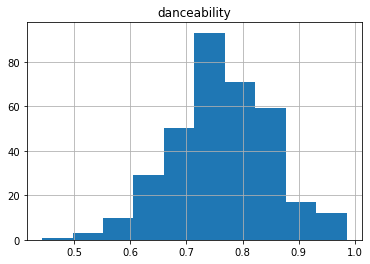

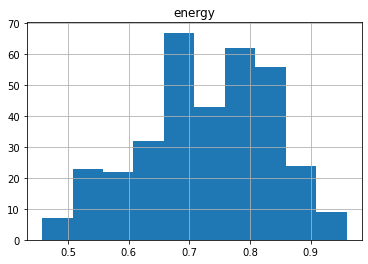

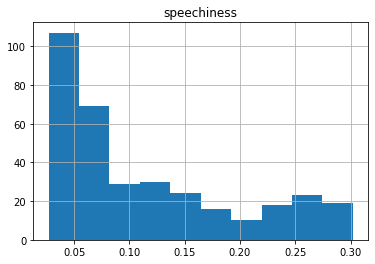

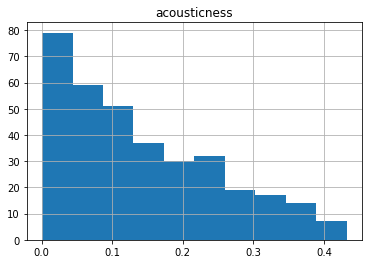

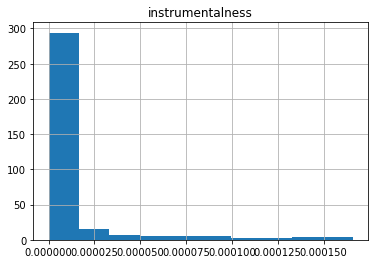

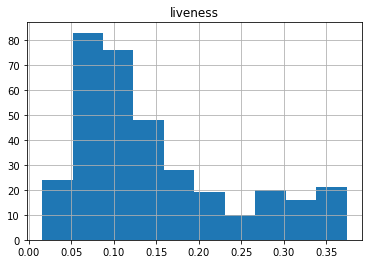

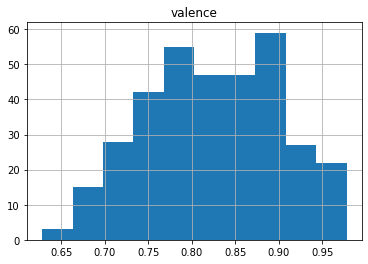

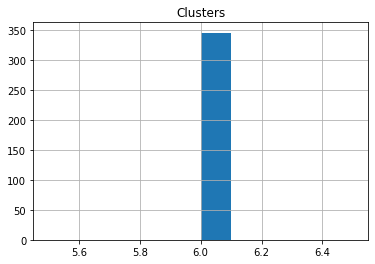

In [17]:
# Plot the histograms 7th cluster 
df_cluster_Aud = df_cluster_Aud.assign(Clusters = Cluster_label)
df_cluster_7 = df_cluster_Aud[df_cluster_Aud['Clusters'] == 6]

for col in df_cluster_7.columns: 
    try:      
        df_cluster_7[col] = pd.to_numeric(df_cluster_7[col]) 
        df_cluster_7.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

/var/folders/bk/kj0nx4px3bq_q295vnctbb5c0000gn/T/ipykernel_278/2874316826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_8[col] = pd.to_numeric(df_cluster_8[col])


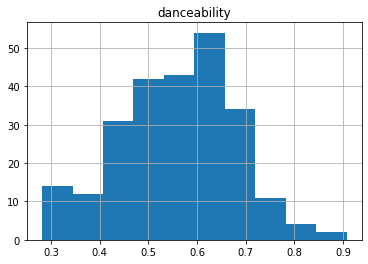

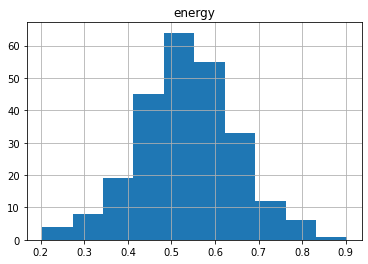

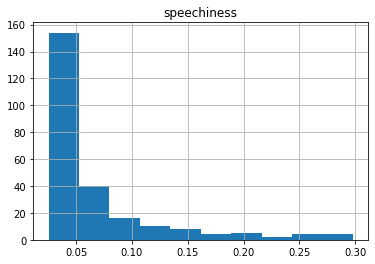

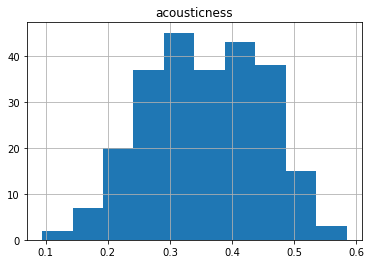

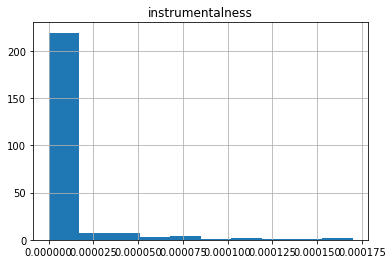

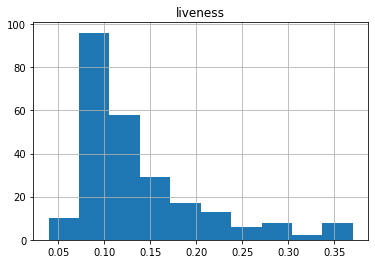

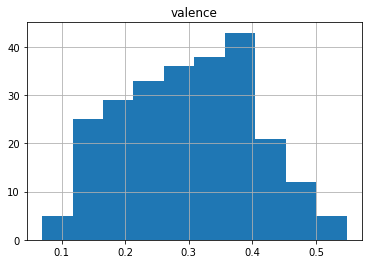

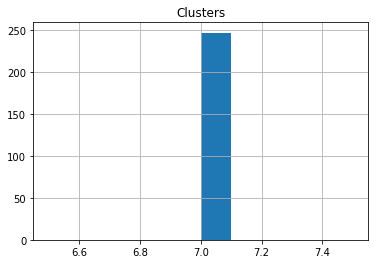

In [18]:
# Plot the histograms 8th cluster 
df_cluster_Aud = df_cluster_Aud.assign(Clusters = Cluster_label)
df_cluster_8 = df_cluster_Aud[df_cluster_Aud['Clusters'] == 7]

for col in df_cluster_8.columns: 
    try:      
        df_cluster_8[col] = pd.to_numeric(df_cluster_8[col]) 
        df_cluster_8.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')